In [2]:
import torch as t

### 张量
    不同于tensorflow要先声明和初始化张量，pytorch是一种动态图，它的声明和赋值是同时进行的
    Tensor和Numpy的ndarrays类似，但Tensor可以使用GPU进行加速

In [3]:
t.Tensor(5,3) #随机初始化一个 5×3 的二维张量

tensor([[0.0000e+00, 1.4013e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00],
        [1.1704e-41, 0.0000e+00, 2.2369e+08],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

In [8]:
#初始化服从均匀分布的张量
t.Tensor(2,3).uniform_(1,10)

tensor([[2.3026, 6.7605, 6.4989],
        [8.5341, 4.6301, 4.8748]])

In [10]:
x = t.rand(5,3) #使用[0,1]均匀分布随机初始化二维数组
x

tensor([[5.2970e-01, 9.2516e-01, 3.1662e-01],
        [2.5290e-04, 7.1845e-01, 9.7930e-01],
        [8.2357e-01, 4.8964e-01, 4.5155e-01],
        [7.2843e-01, 3.0288e-01, 2.1629e-01],
        [6.1369e-01, 8.6685e-01, 9.6215e-01]])

In [12]:
print(x.size())
print(x.size(1))
print(x.size()[1])

x.size(1),x.size()[1]

torch.Size([5, 3])
3
3


(3, 3)

In [15]:
#torch.Size 是tuple对象的子类，因此它支持tuple的所有操作，如x.size()[0]
y = t.rand(5,3)
y

tensor([[0.7599, 0.0450, 0.8956],
        [0.0529, 0.7145, 0.3673],
        [0.1733, 0.1186, 0.9735],
        [0.7012, 0.5004, 0.2024],
        [0.6097, 0.9872, 0.4167]])

In [16]:
x+y

tensor([[1.2896, 0.9702, 1.2122],
        [0.0531, 1.4329, 1.3466],
        [0.9969, 0.6083, 1.4251],
        [1.4296, 0.8033, 0.4187],
        [1.2234, 1.8541, 1.3789]])

In [17]:
t.add(x,y)

tensor([[1.2896, 0.9702, 1.2122],
        [0.0531, 1.4329, 1.3466],
        [0.9969, 0.6083, 1.4251],
        [1.4296, 0.8033, 0.4187],
        [1.2234, 1.8541, 1.3789]])

In [18]:
#加法的第三种写法：指定输出为result
result = t.Tensor(5,3) #预先分配空间
t.add(x,y,out=result)
result

tensor([[1.2896, 0.9702, 1.2122],
        [0.0531, 1.4329, 1.3466],
        [0.9969, 0.6083, 1.4251],
        [1.4296, 0.8033, 0.4187],
        [1.2234, 1.8541, 1.3789]])

In [19]:
#加法比较
print("最初y")
print(y)

print("加法一，y不变")
y.add(x) #普通加法，不改变y
print(y)

print("加法二，y改变")
y.add_(x) #inplace方法，y改变
print(y)

最初y
tensor([[0.7599, 0.0450, 0.8956],
        [0.0529, 0.7145, 0.3673],
        [0.1733, 0.1186, 0.9735],
        [0.7012, 0.5004, 0.2024],
        [0.6097, 0.9872, 0.4167]])
加法一，y不变
tensor([[0.7599, 0.0450, 0.8956],
        [0.0529, 0.7145, 0.3673],
        [0.1733, 0.1186, 0.9735],
        [0.7012, 0.5004, 0.2024],
        [0.6097, 0.9872, 0.4167]])
加法二，y改变
tensor([[1.2896, 0.9702, 1.2122],
        [0.0531, 1.4329, 1.3466],
        [0.9969, 0.6083, 1.4251],
        [1.4296, 0.8033, 0.4187],
        [1.2234, 1.8541, 1.3789]])


注：函数名后面带下划线_ 的函数会修改Tensor本身

#### Tensor的选取操作与Numpy类似
对于Tensor不支持的操作，可以先转为Numpy数组处理，之后再转回Tensor

In [25]:
#Tensor
a = t.ones(3)
a

tensor([1., 1., 1.])

In [21]:
#numpy
import numpy as np
b = np.ones(3)
b

array([1., 1., 1.])

In [22]:
#tensor转换为numpy
a.numpy() 

array([1., 1., 1.], dtype=float32)

In [27]:
#numpy转换为tensor
c = t.from_numpy(b)

In [28]:
c.add_(1)
print(c)
print(b)

tensor([2., 2., 2.], dtype=torch.float64)
[2. 2. 2.]


注：tensor & numpy之间的转换很快，几乎不消耗什么内存，这也意味着两者之间共享内存，即一个改变，另一个也随之改变

### autograd: 自动微分
要想使用tensor的自动微分功能，只需要设置tensor.requries_grad=True.

In [34]:
x = t.ones(2,2)
x

tensor([[1., 1.],
        [1., 1.]])

In [35]:
x = t.ones(2, 2, requires_grad=True)
x

tensor([[1., 1.],
        [1., 1.]], requires_grad=True)

In [36]:
y = x.sum()
y

tensor(4., grad_fn=<SumBackward0>)

In [37]:
y.grad_fn

In [38]:
#反向传播
#grad在反向传播过程中是累加的(accumulated)，这意味着每一次运行反向传播，梯度都会累加之前的梯度，所以反向传播之前需把梯度清零。

y.backward()
print(x.grad)

y.backward()
print(x.grad)

y.backward()
print(x.grad)

tensor([[1., 1.],
        [1., 1.]])
tensor([[2., 2.],
        [2., 2.]])
tensor([[3., 3.],
        [3., 3.]])


In [39]:
# 以下划线结束的函数是inplace操作，会修改自身的值，就像add_
x.grad.data.zero_()

tensor([[0., 0.],
        [0., 0.]])

In [40]:
y.backward()
print(x.grad)

tensor([[1., 1.],
        [1., 1.]])


### 最优化模块
torch.optim 是实现神经网络中多种优化算法的模块，它目前已经支持大多数一般的方法，所以我们不需要从头构建优化算法

In [44]:
# 使用 Adam 优化器的基本代码：
# optimizer = t.optim.Adam(model.parameters(), lr=learning_rate)

### 神经网络 
Autograd实现了反向传播功能，但是直接用来写深度学习的代码在很多情况下还是稍显复杂，torch.nn是专门为神经网络设计的模块化接口。nn构建于 Autograd之上，可用来定义和运行神经网络。nn.Module是nn中最重要的类，可把它看成是一个网络的封装，包含网络各层定义以及forward方法，调用forward(input)方法，可返回前向传播的结果。下面就以最早的卷积神经网络：LeNet为例，来看看如何用nn.Module实现。LeNet的网络结构如图2-7所示。
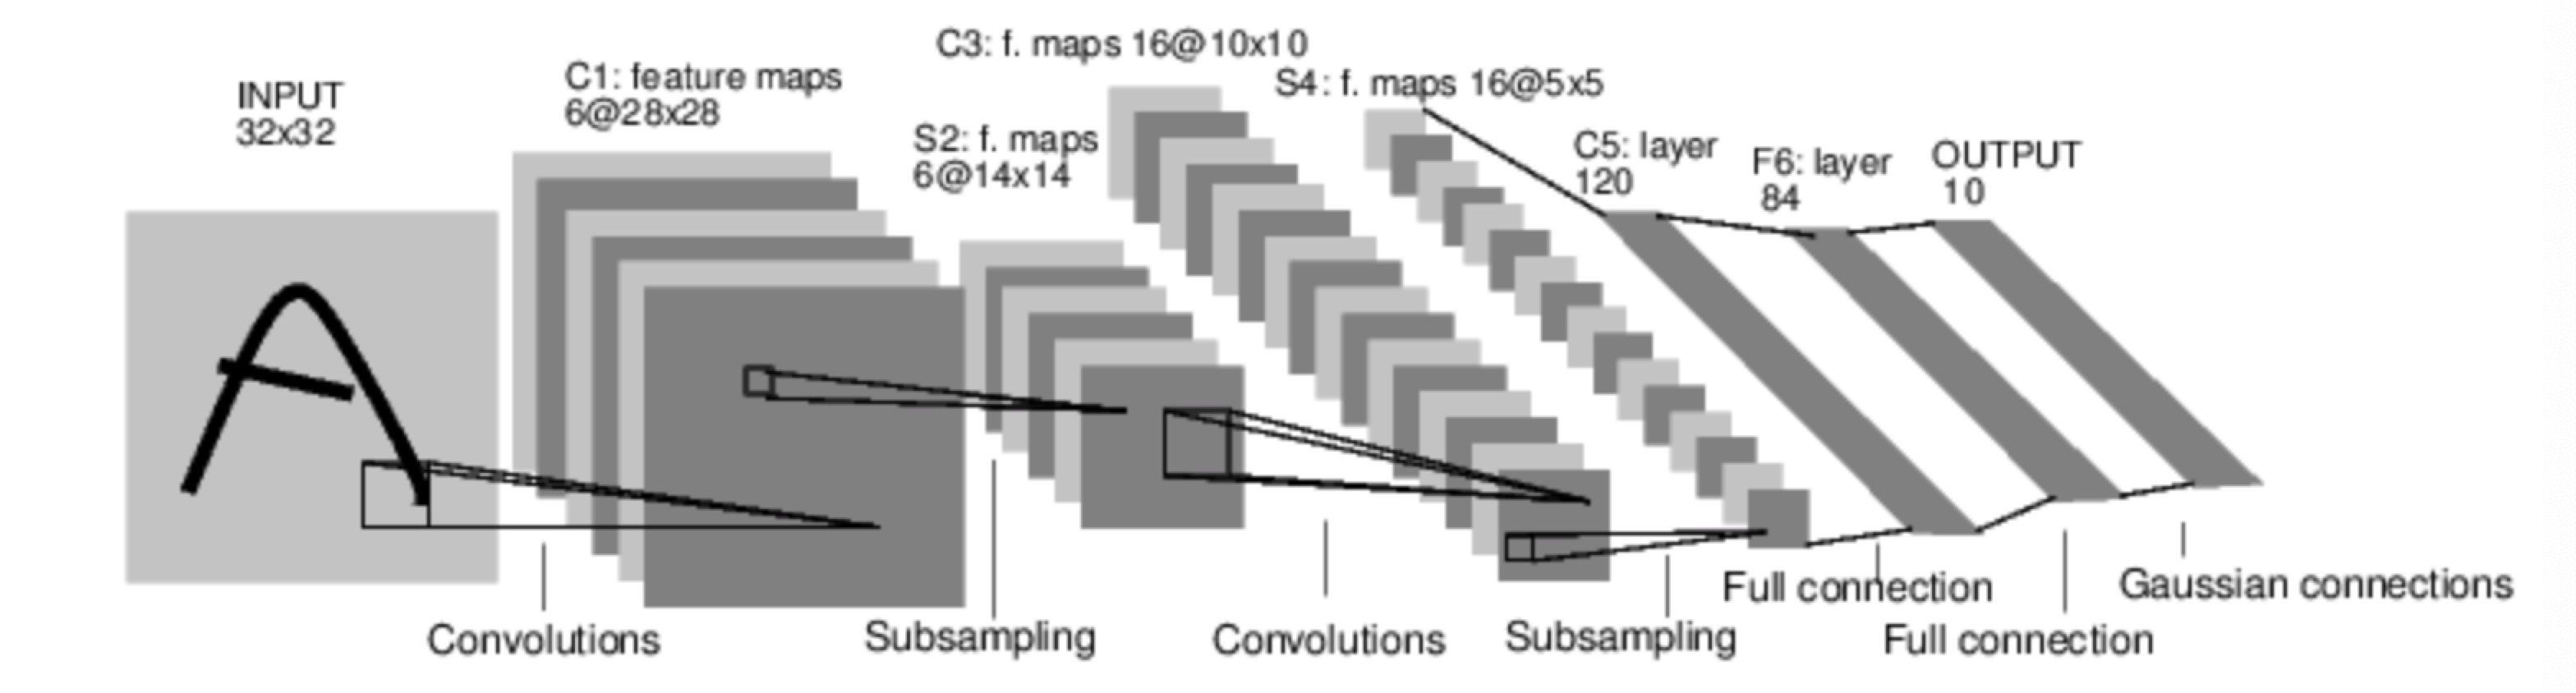

这是一个基础的前向传播(feed-forward)网络: 接收输入，经过层层传递运算，得到输出。

In [84]:
import torch.nn as nn
import torch.nn.functional as f

class Net(nn.Module):
    def __init__(self):
        # nn.Module子类的函数必须在构造函数中执行父类的构造函数
        # 下式等价于 nn.Module.__init__(self)
        super(Net, self).__init__()
        
        #卷积层
        self.conv1 = nn.Conv2d(1,6,5) #1表示输入图片为单通道，6表示输出通道数，5表示卷积核为5*5
        #卷积层
        self.conv2 = nn.Conv2d(6,16,5)
        #全连接层 y=wx+b
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    
    def forward(self,x):
        # 卷积->激活->池化
        x = f.max_pool2d(f.relu(self.conv1(x)),(2,2)) 
        x = f.max_pool2d(f.relu(self.conv2(x)),2) 
        #reshape,  '-1'表示自适应
        x = x.view(x.size()[0],-1)
        x = f.relu(self.fc1(x))
        x = f.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [49]:
#网络的可学习参数通过net.parameters()返回，net.named_parameters可同时返回可学习的参数及名称。
params = list(net.parameters())
print(len(params))

print('------------------')

for name,parameters in net.named_parameters():
    print(name,":",parameters.size())

10
------------------
conv1.weight : torch.Size([6, 1, 5, 5])
conv1.bias : torch.Size([6])
conv2.weight : torch.Size([16, 6, 5, 5])
conv2.bias : torch.Size([16])
fc1.weight : torch.Size([120, 400])
fc1.bias : torch.Size([120])
fc2.weight : torch.Size([84, 120])
fc2.bias : torch.Size([84])
fc3.weight : torch.Size([10, 84])
fc3.bias : torch.Size([10])


只要在nn.Module的子类中定义了forward函数，backward函数就会自动被实现(利用autograd)

In [56]:
t.randn(1,1,3,2)

tensor([[[[-0.3879, -0.8651],
          [ 0.2065, -0.1446],
          [ 1.2264,  1.8016]]]])

In [85]:
in_put = t.randn(1,1,32,32)
out = net(in_put)
out.size()

torch.Size([1, 10])

#需要注意的是，torch.nn只支持mini-batches，不支持一次只输入一个样本，即一次必须是一个batch。但如果只想输入一个样本，则用 input.unsqueeze(0)将batch_size设为１。例如 nn.Conv2d 输入必须是4维的，形如$nSamples \times nChannels \times Height \times Width$。可将nSample设为1，即$1 \times nChannels \times Height \times Width$。

### 完成一个深度学习的代码 

线性层- nn.Linear、nn.Bilinear

卷积层 - nn.Conv1d、nn.Conv2d、nn.Conv3d、nn.ConvTranspose2d

非线性激活函数- nn.Sigmoid、nn.Tanh、nn.ReLU、nn.LeakyReLU

池化层 - nn.MaxPool1d、nn.AveragePool2d

循环网络 - nn.LSTM、nn.GRU

归一化 - nn.BatchNorm2d

Dropout - nn.Dropout、nn.Dropout2d

嵌入 - nn.Embedding

损失函数 - nn.MSELoss、nn.CrossEntropyLoss、nn.NLLLoss

#### 实现对CIFAR-10数据集的分类，步骤：
    1. 使用torchvision加载并预处理CIFAR-10数据集
    2.定义网络
    3.定义损失函数和优化器
    4.训练网络并更新网络参数
    5.测试网络
    http://www.cs.toronto.edu/~kriz/cifar.html

1. 数据加载及预处理

In [95]:
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage #可以把tensor转化成Image,方便可视化
show = ToPILImage()

In [126]:
#第一次运行时程序torchvision会自动下载数据集  大约100M
#如已下载，可通过root参数指定

#对数据的预处理
transform = transforms.Compose([
    transforms.ToTensor(), #转为tensor
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))  #归一化
])

#训练集
trainset = tv.datasets.CIFAR10(
                                root='./',
                                train = True,
                                download=True,
                                transform = transform)

trainloader = t.utils.data.DataLoader(
                                  trainset,
                                  batch_size = 4,
                                  shuffle = True,
                                  num_workers=2
)

#测试集
testset = tv.datasets.CIFAR10(
                                root='./',
                                train = False,
                                download=True,
                                transform = transform)

testloader = t.utils.data.DataLoader(
                                  testset,
                                  batch_size = 4,
                                  shuffle = False,
                                  num_workers=2
)

classes  = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


8
ship


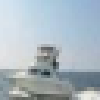

In [127]:
# dataset对象是一个数据集，可以按下标访问
(data,label) = trainset[100]
print(label)
print(classes[label])

#(data+1)/2: 还原被归一化的数据
show((data+1)/2).resize((100,100))

Dataloader是一个可迭代的对象，它将dataset返回的每一条数据拼接成一个batch，并提供多线程加速优化和数据打乱等操作。当程序对dataset的所有数据遍历完一遍之后，相应的对Dataloader也完成了一次迭代

           plane              car             frog             deer


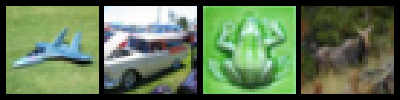

In [128]:
dataiter = iter(trainloader)
images,labels = dataiter.next() #返回4张图片及标签  #前面已设置batch_size=4
print(' '.join('%16s' %classes[labels[j]] for j in range(4)))

show(tv.utils.make_grid((images+1)/2)).resize((400,100))  #resize:设置图片大小

定义网络

In [129]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)  #3通道彩图
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


定义损失函数和优化器(loss & optimizer) 

In [130]:
from torch import optim
criterion = nn.CrossEntropyLoss()  #交叉熵损失函数
optimizer = optim.SGD(net.parameters(),lr=0.001,momentum=0.9)
# momentum：动量，来源于牛顿定律，基本思想是为了找到最优加入“惯性”的影响，当误差曲面中存在平坦区域，SGD就可以更快的学习。
# lr: 学习率

训练网络

    流程：
        1.输入数据
        2.前向传播+反向传播
        3.更新参数

In [131]:
t.set_num_threads(8)
for epoch in range(2):
    running_loss = 0.0
    for i,data in enumerate(trainloader,0):
        
        #输入数据
        inputs, labels = data
        
        #梯度清零
        optimizer.zero_grad()
        
        # forward + backward
        outputs = net(inputs)
        loss  = criterion(outputs, labels)
        loss.backward()
        
        #更新参数
        optimizer.step()
        
        #打印log信息
        #loss是一个scalar，需要使用loss.item()来获取数值，不能使用loss[0]
        running_loss +=loss.item()
        if i % 2000 ==1999: #每2000个batch打印一下训练状态
            print('[%d,%5d] loss: %.3f' %(epoch+1, i+1, running_loss/2000))
            running_loss = 0
print('finished training')

[1, 2000] loss: 2.227
[1, 4000] loss: 1.875
[1, 6000] loss: 1.700
[1, 8000] loss: 1.613
[1,10000] loss: 1.531
[1,12000] loss: 1.498
[2, 2000] loss: 1.436
[2, 4000] loss: 1.399
[2, 6000] loss: 1.358
[2, 8000] loss: 1.325
[2,10000] loss: 1.295
[2,12000] loss: 1.280
finished training


此处仅训练了2个epoch（遍历完一遍数据集称为一个epoch），来看看网络有没有效果。将测试图片输入到网络中，计算它的label，然后与实际的label进行比较。

实际的label:      cat     ship     ship    plane


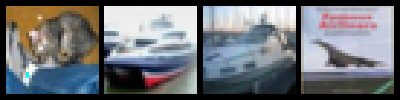

In [140]:
dataiter = iter(testloader)
images, labels = dataiter.next() #一个batch返回4张图片
print('实际的label:',' '.join(\
                          '%08s' %classes[labels[i]] for i in range(4)))

show(tv.utils.make_grid(images/2-0.5)).resize((400,100))

In [139]:
#网络预测的label

#计算图片在每个类别上的分数
outputs = net(images)

#得分最高的那个类
_,predicted = t.max(outputs.data,1)

print('预测结果：',' '.join('%05s' %classes[labels[i]] for i in range(4)))

预测结果：   cat  ship  ship plane


以上4张图片均预测正确，看看在整个测试集上的效果

In [144]:
correct = 0 #预测正确的数量
total = 0  #总图片数

#由于测试不需要求导，可暂时关闭autograd，节约内存
with t.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = t.max(outputs.data,1)
        total += labels.size(0)
        correct += (predicted==labels).sum()
        
print('10000张测试集中的准确率为：%d %%' %(100*correct/total))

10000张测试集中的准确率为：55 %


准确率远高于随机猜测(10%),证明学到了东西